This code vetos the muon events recorded in coincidence in two scintillators above and below an SPC. 

It also produces the amplitude-rise time plots to compare the effectiveness of the vetoing on reducing cosmic ray muon background. 

CSV headings: 

,

event,

amplitude,

risetime,

width,

50 percent,

baseline,

baseline_RMS,

rising_edge,

deconvolved_amplitude,

deconvolved_rising_edge,

deconvolved_risetime,

start_time,

pulse_number



Units:

All times in microseconds, all voltages in ADU (proportional to the DAQ voltage pulse)

In [2]:
#import the datasets
import pandas as pd
import os
import matplotlib.pyplot as plt # https://matplotlib.org/
import numpy as np # http://www.numpy.org/


#sphere data
sphere_filename = "Petes_Data/zh21h019"
anodes = ["F0","F1","F2","F3","F4","F5","N1","N2","N3","N4","N5","Laser"]
sphere_dataframes = {}
for anode in anodes:
    sphere_dataframes[anode] = pd.read_csv(f"{sphere_filename}_{anode}.csv")


'''
#veto data
veto_filename = "Veto_Data/veto_010226" #for file name eg. veto_010226_T1
scintillators = ["T1","T2","B1","B2"] #4 scintillators: top1, top2, bottom1, bottom2
veto_dataframes = {}
for scintillator in scintillators:
    veto_dataframes[scintillator] = pd.read_csv(f"{veto_filename}_{scintillator}.csv")


    
#set veto window time (120us?)
veto_time_window = 120e-6
'''

'\n#veto data\nveto_filename = "Veto_Data/veto_010226" #for file name eg. veto_010226_T1\nscintillators = ["T1","T2","B1","B2"] #4 scintillators: top1, top2, bottom1, bottom2\nveto_dataframes = {}\nfor scintillator in scintillators:\n    veto_dataframes[scintillator] = pd.read_csv(f"{veto_filename}_{scintillator}.csv")\n\n\n\n#set veto window time (120us?)\nveto_time_window = 120e-6\n'

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
/var/folders/54/shy8r4g15d33hf9px0m5hytc0000gn/T/ipykernel_56485/3717858944.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel(f'Rise Time ($\mu$s)')


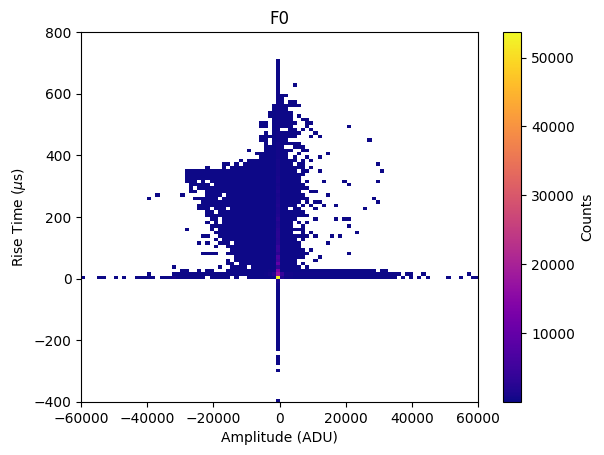

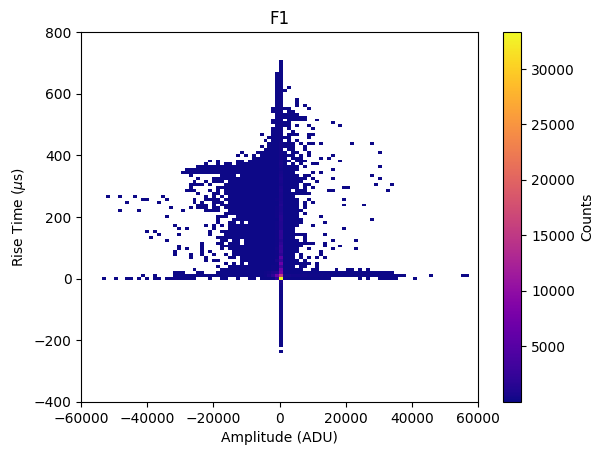

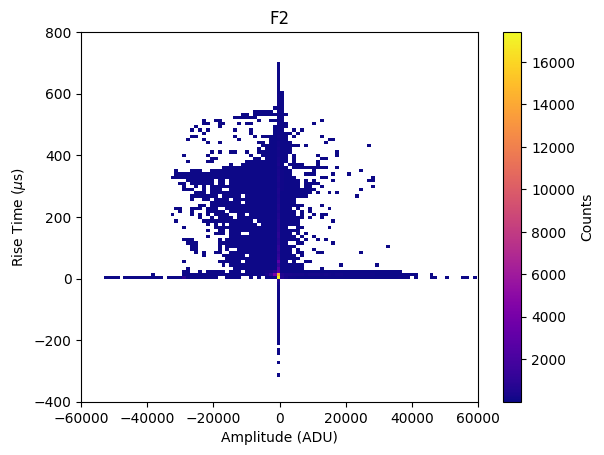

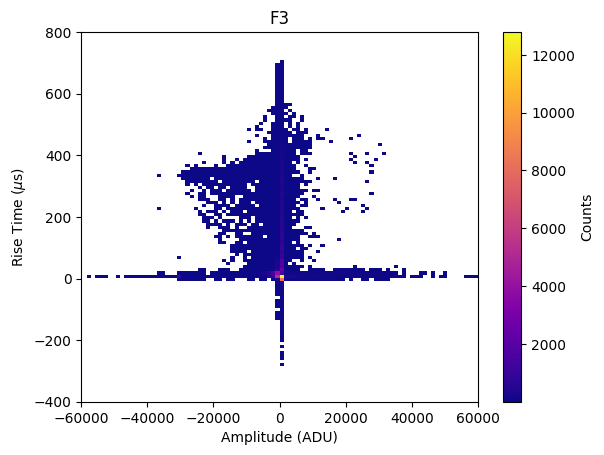

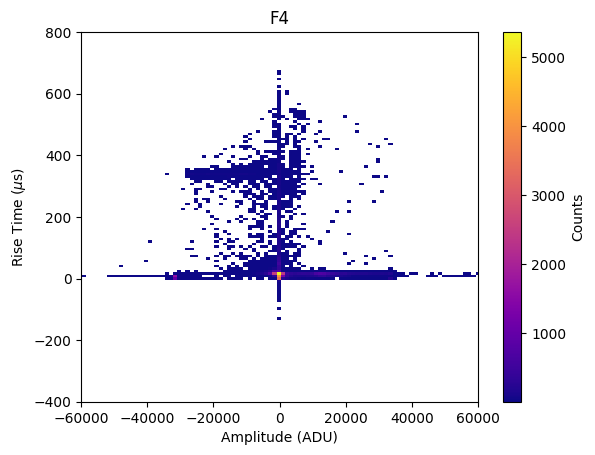

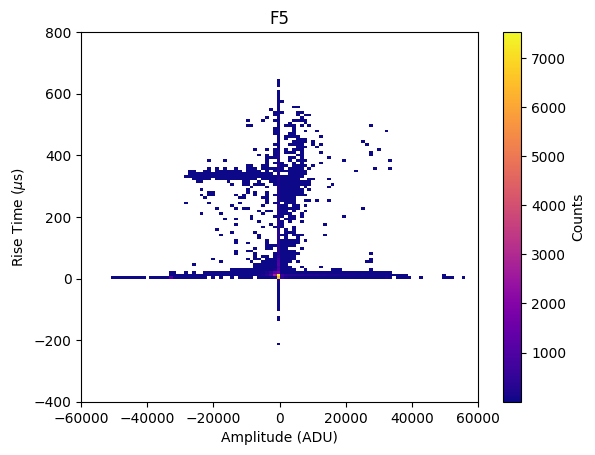

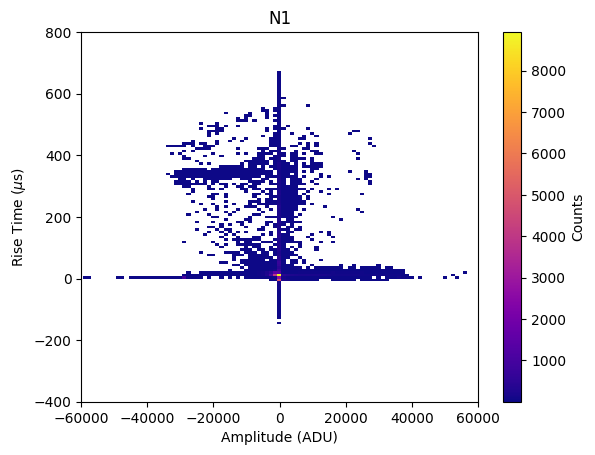

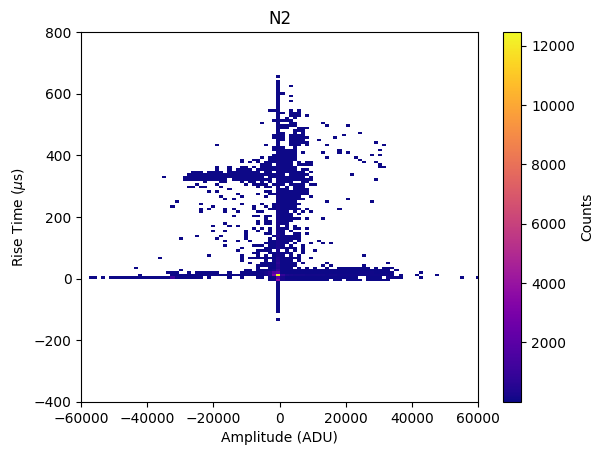

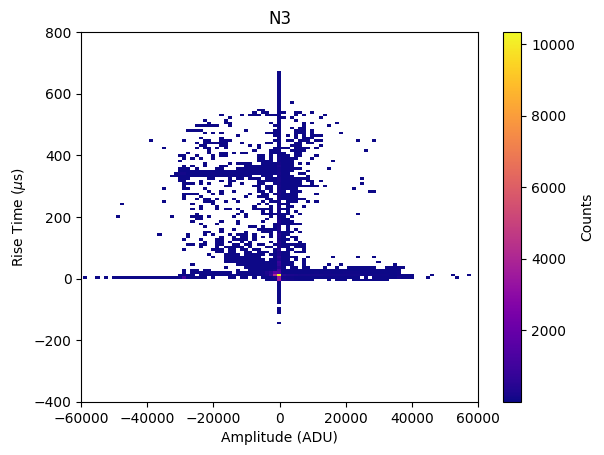

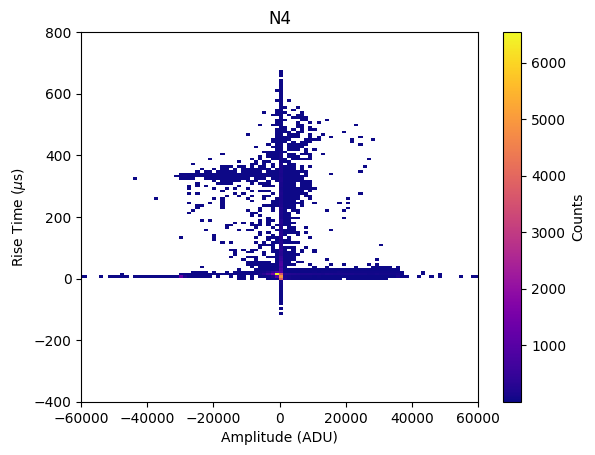

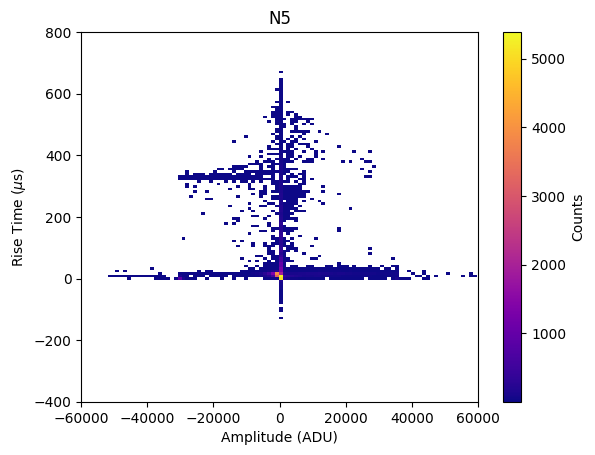

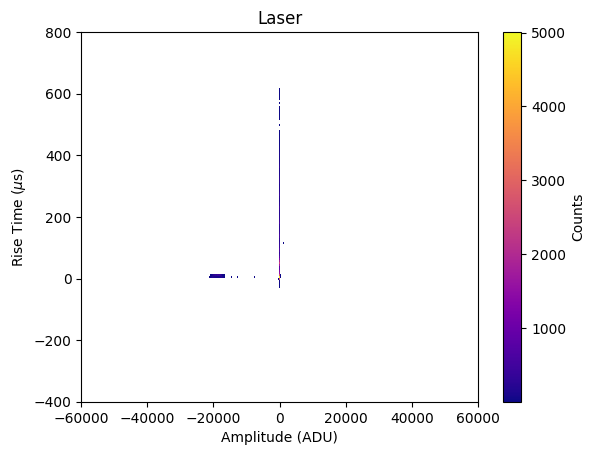

In [9]:
#produce amplitude vs rise time from sphere data for each anode, should see muon background (region 3)

for anode, df in sphere_dataframes.items():
    amplitudes = df['amplitude']
    rise_times = df['risetime']
    #rise_times = df['deconvolved_risetime']
    #amplitudes = df['deconvolved_amplitude']

    h = plt.hist2d(
        amplitudes, 
        rise_times, 
        bins=100,           # finer resolution
        density=False, 
        cmap='plasma',     # nicer color map
        cmin=1
    )

    plt.title(f"{anode}")
    plt.xlim(-60000,60000)
    plt.ylim(-400,800)
    plt.ylabel(f'Rise Time ($\mu$s)')
    plt.xlabel('Amplitude (ADU)')
    plt.colorbar(h[3], label='Counts')  # colorbar
    plt.show()

In [4]:
#find events coincident in both scintillators - these will have passed through the sphere

In [5]:
#find the time for these events

In [6]:
#delete the events in the sphere around this time (for the veto window time set at the beginning)

In [7]:
#produce amplitude vs rise time to see region 3 (cosmic ray muon background) reduced